In [1]:
from bs4 import BeautifulSoup
from collections import Counter
import json
import re
import math
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
import operator
import urllib2
from wordcloud import WordCloud
import matplotlib.pylab as plt
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image

In [2]:
# used to clean the html tags when needed
def striphtml(data):
    p = re.compile(r'<.*?>')
    return p.sub('', data)

## Retrieving the transcripts

For each movie, we retrieve the transcripts, so some cleaning in order to be able to separate the characters from their lines and save the transcipts in a dictionary with keys being the name of the character and the value is all they say in the current movie. We also make the keys for the characters we are interested in to be the same for all movies. In the end, we dump each dictionary in a json file.

### The Avengers

In [3]:
page1 = urllib2.urlopen('http://fullmovietext.com/scenes/1/avengers')
soup1 = BeautifulSoup(page1, 'html.parser')
scenes_urls = soup1.find('table').find_all('a')
scenes_urls = ['http://fullmovietext.com' + scene_url['href'] for scene_url in scenes_urls]
characters_with_transcripts1 = {}

avengers_1_line_count = 0
for scene_url in scenes_urls:
    scene_raw = urllib2.urlopen(scene_url)
    scene_soup = BeautifulSoup(scene_raw, 'html.parser')
    lines = scene_soup.find_all('ul', attrs={'class':'media-list'})[1]
    lines = lines.find_all('li')

    for line in lines:
        if line.find('small'):
            avengers_1_line_count += 1
            key = line.find('small').text
            line.find('small').clear()
            line.find('small').parent.find('div').clear()
            value = line.find('small').parent.text
            if key not in characters_with_transcripts1.keys():
                characters_with_transcripts1[key] = value
            else:
                characters_with_transcripts1[key] += value

characters_with_transcripts1['Steve Rogers'] = characters_with_transcripts1['Captain America']
del characters_with_transcripts1['Captain America']

with open('transcripts_avengers_1.json', 'w') as fp:
    json.dump(characters_with_transcripts1, fp, indent=4)

### Avengers: Age of Ultron

In [4]:
page2 = urllib2.urlopen('http://transcripts.wikia.com/wiki/Avengers:_Age_of_Ultron')
soup2 = BeautifulSoup(page2, 'html.parser')
lines = soup2.find('div', attrs = {'id':'mw-content-text'}).find_all('li')

avengers_2_line_count = 0

characters_with_transcripts2 = {}
for line in lines:
    line = str(line)
    
    if '</b>' in line:
        avengers_2_line_count += 1

        data = line.split('</b>')
        name = striphtml(data[0])
        name = re.sub(r'[\':]','', name).strip()
        transcript = striphtml(data[1])
        transcript = re.sub(r'[\n\\]','', transcript)
        transcript = re.sub(r'\[[^]]*\]', '', transcript)
        if name not in characters_with_transcripts2.keys():
            characters_with_transcripts2[name] = transcript
        else:
            characters_with_transcripts2[name] += ' ' + transcript
            
characters_with_transcripts2['Tony Stark (Ironman)'] = characters_with_transcripts2['Tony Stark']
del characters_with_transcripts2['Tony Stark']

characters_with_transcripts2['Dr. Banner (The Hulk)'] = characters_with_transcripts2['Bruce Banner']
del characters_with_transcripts2['Bruce Banner']

with open('transcripts_avengers_2.json', 'w') as fp:
    json.dump(characters_with_transcripts2, fp, indent=4)

### Avengers: Infinity War

In [5]:
page3 = urllib2.urlopen('http://transcripts.wikia.com/wiki/Avengers:_Infinity_War')
soup3 = BeautifulSoup(page3, 'html.parser')
lines3 = soup3.find('div', attrs={'id':'mw-content-text'}).find_all('p')

avengers_3_line_count = 0

characters_with_transcripts3 = {}
for line in lines3:
    line = str(line)
    line = line.decode('unicode_escape').encode('ascii','ignore')
    
    data = None
    if ':</b>' in line:
        data = line.split(':</b>')
    if '</b>:' in line:
        data = line.split('</b>:')    
    if data:
        avengers_3_line_count += 1

        name = striphtml(data[0])
        name = re.sub(r'[\':]','', name).strip()
        transcript = striphtml(data[1])
        transcript = re.sub(r'\n','', transcript)
        transcript = re.sub(r'\[[^]]*\]', '', transcript)
        if name not in characters_with_transcripts3.keys():
            characters_with_transcripts3[name] = transcript
        else:
            characters_with_transcripts3[name] += ' ' + transcript

characters_with_transcripts3['Tony Stark (Ironman)'] = characters_with_transcripts3['Tony Stark']
del characters_with_transcripts3['Tony Stark']

characters_with_transcripts3['Dr. Banner (The Hulk)'] = characters_with_transcripts3['Bruce Banner']
characters_with_transcripts3['Dr. Banner (The Hulk)'] += characters_with_transcripts3['Hulk']
del characters_with_transcripts3['Bruce Banner']
del characters_with_transcripts3['Hulk']


with open('transcripts_avengers_3.json', 'w') as fp:
    json.dump(characters_with_transcripts3, fp, indent=4)

### Iron Man 2

In [6]:
page_iron_man_2 = urllib2.urlopen('http://transcripts.wikia.com/wiki/Iron_Man_2')
soup_iron_man_2 = BeautifulSoup(page_iron_man_2, 'html.parser')
characters_iron_man_2 = soup_iron_man_2.find('div', attrs = {'id':'mw-content-text'}).find_all('b')
lines_iron_man_2 = soup_iron_man_2.find('div', attrs={'id':'mw-content-text'}).find_all('p')

iron_man_2_line_count = 0

characters_with_transcripts_iron_man_2 = {}
for line in lines_iron_man_2:
    line = str(line)
    line = line.decode('unicode_escape').encode('ascii','ignore')
    
    data = None
    if ':</b>' in line:
        data = line.split(':</b>')
    if '</b>:' in line:
        data = line.split('</b>:')    
    if data:
        iron_man_2_line_count +=1

        name = striphtml(data[0])
        name = re.sub(r'\[[^]]*\]', '', name)
        name = re.sub(r'\([^]]*\)', '', name)
        name = re.sub(r'[\':]','', name).strip()
        
        transcript = striphtml(data[1])
        transcript = re.sub(r'\n','', transcript)
        transcript = re.sub(r'\[[^]]*\]', '', transcript)

        if name not in characters_with_transcripts_iron_man_2.keys():
            characters_with_transcripts_iron_man_2[name] = transcript
        else:
            characters_with_transcripts_iron_man_2[name] += ' ' + transcript

characters_with_transcripts_iron_man_2['Tony Stark (Ironman)'] = characters_with_transcripts_iron_man_2['Tony']
del characters_with_transcripts_iron_man_2['Tony']

with open('transcripts_iron_man_2.json', 'w') as fp:
    json.dump(characters_with_transcripts_iron_man_2, fp, indent=4)


### Iron Man 3


In [7]:
page_iron_man_3 = urllib2.urlopen('http://transcripts.wikia.com/wiki/Iron_Man_3')
soup_iron_man_3 = BeautifulSoup(page_iron_man_3, 'html.parser')
characters_iron_man_3 = soup_iron_man_3.find('div', attrs = {'id':'mw-content-text'}).find_all('b')
lines_iron_man_3 = soup_iron_man_3.find('div', attrs = {'id':'mw-content-text'}).find_all('li')

iron_man_3_line_count = 0

characters_with_transcripts_iron_man_3 = {}
for line in lines_iron_man_3:
    line = str(line)
    
    if '</b>' in line:
        iron_man_3_line_count += 1
        data = line.split('</b>')
        name = striphtml(data[0])
        name = re.sub(r'[\':]','', name).strip()
        transcript = striphtml(data[1])
        transcript = re.sub(r'[\n\\]','', transcript)
        transcript = re.sub(r'\[[^]]*\]', '', transcript)
        transcript = re.sub(r'[\':]','', transcript)
        
        if name not in characters_with_transcripts_iron_man_3.keys():
            characters_with_transcripts_iron_man_3[name] = transcript
        else:
            characters_with_transcripts_iron_man_3[name] += ' ' + transcript
            
characters_with_transcripts_iron_man_3['Tony Stark (Ironman)'] = characters_with_transcripts_iron_man_3['Tony Stark']
del characters_with_transcripts_iron_man_3['Tony Stark']

with open('transcripts_iron_man_3.json', 'w') as fp:
    json.dump(characters_with_transcripts_iron_man_3, fp, indent=4)

### Hulk from Thor: Ragnarok

We used Thor: Ragnarok for Hulk's additional transcripts because we could not get the transcripts from Incredible Hulk. Hulk plays an important role in this movie, so we thought it is relevant enough.

In [8]:
page_hulk = urllib2.urlopen('http://transcripts.wikia.com/wiki/Thor:_Ragnarok')
soup_hulk = BeautifulSoup(page_hulk, 'html.parser')
characters_hulk = soup_hulk.find('div', attrs = {'id':'mw-content-text'}).find_all('b')
lines_hulk = soup_hulk.find('div', attrs={'id':'mw-content-text'}).find_all('p')

hulk_line_count = 0

characters_with_transcripts_hulk = {}
for line in lines_hulk:
    line = str(line)
    line = line.decode('unicode_escape').encode('ascii','ignore')
    
    data = None
    if ':</b>' in line:
        data = line.split(':</b>')
    if '</b>:' in line:
        data = line.split('</b>:')    
    if data:
        hulk_line_count += 1
        name = striphtml(data[0])
        name = re.sub(r'\[[^]]*\]', '', name)
        name = re.sub(r'\([^]]*\)', '', name)
        name = re.sub(r'[\':]','', name).strip()
        
        transcript = striphtml(data[1])
        transcript = re.sub(r'\n','', transcript)
        transcript = re.sub(r'\[[^]]*\]', '', transcript)
        if name not in characters_with_transcripts_hulk.keys():
            characters_with_transcripts_hulk[name] = transcript
        else:
            characters_with_transcripts_hulk[name] += ' ' + transcript

characters_with_transcripts_hulk.keys()
characters_with_transcripts_hulk['Dr. Banner (The Hulk)'] = characters_with_transcripts_hulk['Bruce']
characters_with_transcripts_hulk['Dr. Banner (The Hulk)'] += characters_with_transcripts_hulk['Hulk']
del characters_with_transcripts_hulk['Bruce']
del characters_with_transcripts_hulk['Hulk']
with open('transcripts_hulk.json', 'w') as fp:
    json.dump(characters_with_transcripts_hulk, fp)

## Further cleaning of the dataset

We performed a part of the cleaning when we retrieved the transcripts, so we were able to separate the characters from their lines. Now we are cleaning the punctuation marks, the numbers and the words that have the length smaller than 4. We also perform tokenization.

In [9]:
# remove the stopwords and words with less than 4 characters from list of tokens
stop_words = stopwords.words('english')
def clean(tokens):
    return [token for token in tokens if token not in stop_words and len(token) > 3]
# tokenize and clean the text
def tokenize_and_clean(characters_with_transcripts):
    tokenizer = RegexpTokenizer(r"(?=\S*[' ])([a-zA-Z'-]+)")
    tokenized_transcripts = {key: tokenizer.tokenize(line.lower()) for key,line in characters_with_transcripts.items()}
    tokenized_transcripts = {key: clean(tokens) for key, tokens in tokenized_transcripts.items()}
    return tokenized_transcripts

In [10]:
tokenized_transcripts = []
characters_with_transcripts = []

def tokenize_file(filename):
    with open(filename) as json_data:
        tmp = json.load(json_data)
        characters_with_transcripts.append(tmp)
    tokenized_transcripts.append(tokenize_and_clean(tmp))
    
tokenize_file('transcripts_avengers_1.json')
tokenize_file('transcripts_avengers_2.json')
tokenize_file('transcripts_avengers_3.json')
tokenize_file('transcripts_iron_man_2.json')
tokenize_file('transcripts_iron_man_3.json')
tokenize_file('transcripts_hulk.json')

## Sentiment analysis

In [11]:
# read the dataset that contains the list of words with computed sentiments 
# that we use in order to compute the character's sentiments
with open('Data_Set_S1.txt') as f:
    LabMT = f.readlines()
    
words_with_ranks = []
LabMT_words = {}
for line in LabMT[4:]:
    words_with_ranks = line.split()
    LabMT_words[words_with_ranks[0]] = float(words_with_ranks[2])

# compute the sentiment of a list of tokens
def sentiment(tokens):
    frequency_list = FreqDist(tokens)
    sum_frequencies = sum(frequency_list.values())
    normalized_frequency = FreqDist()
    for freq in frequency_list:
        normalized_frequency[freq] = float(frequency_list[freq])/sum_frequencies
        
    hedonometer = 0
    for word in set(tokens):
        if word in LabMT_words:
            hedonometer += LabMT_words[word]*normalized_frequency[word]
    return hedonometer

def get_sentiments(tokenized_transcripts):
    sentiments = {key: sentiment(tokens) for key, tokens in tokenized_transcripts.items()}
    return sentiments

In [12]:
sentiments_avangers_1 = get_sentiments(tokenized_transcripts[0])
sentiments_avangers_2 = get_sentiments(tokenized_transcripts[1])
sentiments_avangers_3 = get_sentiments(tokenized_transcripts[2])

print( "The sentiments of the two characters in the first Avengers movie are:")
print( "Ironman:", sentiments_avangers_1['Tony Stark (Ironman)'], "Hulk:", sentiments_avangers_1['Dr. Banner (The Hulk)'])

print( "The sentiments of the two characters in the second Avengers movie are:")
print( "Ironman:", sentiments_avangers_2['Tony Stark (Ironman)'], "Hulk:", sentiments_avangers_2['Dr. Banner (The Hulk)'])

print( "The sentiments of the two characters in the third Avengers movie are:")
print ("Ironman:", sentiments_avangers_3['Tony Stark (Ironman)'], "Hulk:", sentiments_avangers_3['Dr. Banner (The Hulk)'])


The sentiments of the two characters in the first Avengers movie are:
('Ironman:', 4.553356741573034, 'Hulk:', 4.40736842105263)
The sentiments of the two characters in the second Avengers movie are:
('Ironman:', 4.56485128205128, 'Hulk:', 4.456390977443609)
The sentiments of the two characters in the third Avengers movie are:
('Ironman:', 4.884590818363269, 'Hulk:', 4.461377777777779)


## Creating wordclouds

In [13]:
# create dictionary with two keys, that contains all words for Ironman Hulk, respectively
# this is used for the creation of the wordclouds
tokenized_transcripts_all = {}
tokenized_transcripts_all['Tony Stark (Ironman)'] = tokenized_transcripts[0]['Tony Stark (Ironman)'] + tokenized_transcripts[1]['Tony Stark (Ironman)'] + tokenized_transcripts[2]['Tony Stark (Ironman)'] + tokenized_transcripts[3]['Tony Stark (Ironman)'] + tokenized_transcripts[4]['Tony Stark (Ironman)']
tokenized_transcripts_all['Dr. Banner (The Hulk)'] = tokenized_transcripts[0]['Dr. Banner (The Hulk)']+ tokenized_transcripts[1]['Dr. Banner (The Hulk)'] + tokenized_transcripts[2]['Dr. Banner (The Hulk)'] + tokenized_transcripts[5]['Dr. Banner (The Hulk)']

In [14]:
def computeTF(itemDict, finalItems):
    tfDict = {}
    for word, count in itemDict.items():
        tfDict[word] = count/float(len(finalItems))
    return tfDict

def computeIDF(itemDem, allDocument):
    idfDict = {}
    N = len(itemDem)
    counter = Counter(allDocument)
    counter = dict(counter)
    for word, val in counter.items():
        idfDict[word] = math.log10(N/float(val))
    return idfDict

def TF_IDF(ftFile, idfFile):
    td_idf = {}
    for item, val in ftFile.items():
        if item in idfFile.keys():
            td_idf[item] = val * idfFile[item]
    return td_idf

In [15]:
def get_word_cloud(words, IDF, character, maskname, background_color):
    freq = nltk.FreqDist(words)
    count = dict(freq.most_common()) 
    term_frequency = computeTF(count, words) #Compute TF
    tf_idf = TF_IDF(term_frequency, IDF) #TF_IDF
    
    # create a mask to apply it on the wordcloud so it takes the shape we want
    mask = np.array(Image.open(maskname).convert("RGBA"))
    wc = WordCloud(background_color=background_color, mode="RGBA", mask=mask, random_state=42)

    # generate wordcloud from tf_idf
    wc.generate_from_frequencies(tf_idf)
    
    # take the colors from the image
    image_colors = ImageColorGenerator(mask)
    wc.recolor(color_func=image_colors)
    
    # save wordcloud to file
    wc.to_file(character + '.png')
    
    # plot wordcloud
    fig = plt.figure()
    plt.figure(figsize=(30,18))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")    
    plt.show()

In [16]:
total_freq1 = nltk.FreqDist([token for token in tokenized_transcripts_all['Tony Stark (Ironman)']])
total_count1 = dict(total_freq1)
IDF_Iron_Man = computeIDF(total_count1, [keys for keys in total_freq1.keys()]) #Calculate the IDF

total_freq2 = nltk.FreqDist([token for token in tokenized_transcripts_all['Dr. Banner (The Hulk)']])
total_count2 = dict(total_freq2)
IDF_Hulk = computeIDF(total_count2, [keys for keys in total_freq2.keys()]) #Calculate the IDF

get_word_cloud(tokenized_transcripts_all['Tony Stark (Ironman)'], IDF_Iron_Man, 'Iron Man', 'ironmann.png', '#ad262d')
get_word_cloud(tokenized_transcripts_all['Dr. Banner (The Hulk)'], IDF_Hulk, 'Hulk','hulk_mask.png', 'white')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## Statistics

### Normalised word count

We compute the normalised word count over time for each analysed movie, with the intent of finding the movie with more action and the ones with more discussions.

We observe that the iron man 3 move had the least speech, which makes sense, as it has some vely long actions sequences with little to no speech. Opposing this, the Iron Man 2 and Avengers 1 movies have the most speech from our selection.


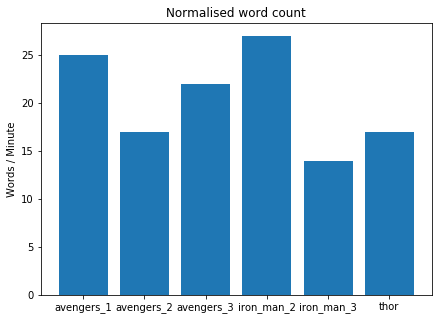

In [17]:
def count_words(transcripts):
    count = 0
    for transript in transcripts:
        count += len(transcript.split())
    return count

labels = ['avengers_1', 'avengers_2', 'avengers_3', 'iron_man_2', 'iron_man_3', 'thor']
relative_word_count = []
relative_word_count.append(count_words(characters_with_transcripts[0])/144)
relative_word_count.append(count_words(characters_with_transcripts[1])/141)
relative_word_count.append(count_words(characters_with_transcripts[2])/149)
relative_word_count.append(count_words(characters_with_transcripts[3])/129)
relative_word_count.append(count_words(characters_with_transcripts[4])/130)
relative_word_count.append(count_words(characters_with_transcripts[5])/112)
plt.figure(figsize=(7,5))
plt.bar(labels, relative_word_count)
plt.ylabel("Words / Minute")
plt.title("Normalised word count")
plt.show()

### Main Characters Importance (Normalised Word count / sequence of movies)

We thought it would be interesting to find out how much "stage time" regarding how much they talk in the movie. We compute this measure as the number of words each of the selectec characters talks divided by the number of total words spoken in the movie. Finally we plot it for four characters across six movies in a bar plot.

We can observe that in the Iron Man movies Tony Stark is the main character, as expected, but he is also the main character from the speech perspective in the Avengers movies, as we all know he talks really fast and much.

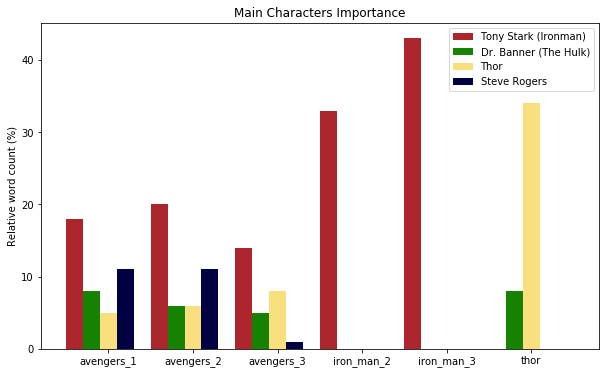

In [25]:
def get_character_no_words(characters_with_transcripts, name):
    data = []
    for transcript in characters_with_transcripts:
        total = sum([len(t.split()) for t in transcript.values()])
        if name in transcript:
            data.append(len(transcript[name].split()) * 100 / total)
        else:
            data.append(0)
    return data

data_tony_stark = get_character_no_words(characters_with_transcripts, 'Tony Stark (Ironman)')
data_hulk = get_character_no_words(characters_with_transcripts, 'Dr. Banner (The Hulk)')
data_thor = get_character_no_words(characters_with_transcripts, 'Thor')
data_captain_america = get_character_no_words(characters_with_transcripts, 'Steve Rogers')

data = [data_tony_stark,
      data_hulk,
      data_thor,
      data_captain_america,
    ]

x_pos = [i + 0.4 for i, _ in enumerate(labels)]

X = np.arange(6)
fig = plt.figure(figsize=(10,6))

plt.bar(X + 0.0, data[0], width = 0.2, color = "#ad262d")
plt.bar(X + 0.2, data[1], width = 0.2, color = "#158202")
plt.bar(X + 0.4, data[2], width = 0.2, color = "#FADF7F")
plt.bar(X + 0.6, data[3], width = 0.2, color = "#000042")
plt.bar(X + 0.8, [0,0,0,0,0,0], width = 0.2)

plt.ylabel("Relative word count (%)")
plt.title("Main Characters Importance")
plt.xticks(x_pos, labels)
plt.legend(['Tony Stark (Ironman)', 'Dr. Banner (The Hulk)', 'Thor', 'Steve Rogers'])


plt.show()

## Simple statistics

We compute the number of lines / movie and the average word count for each line

In [29]:
# this only works by runnin the data retrieval cells at the beginning

movie_lines = [avengers_1_line_count, avengers_2_line_count, avengers_3_line_count,
               iron_man_2_line_count, iron_man_3_line_count, hulk_line_count]
total = []
for transcript in characters_with_transcripts:
    total.append(sum([len(t.split()) for t in transcript.values()]))

average_line_length = [float(total[i]) / movie_lines[i] for i in range(6)]
plt.figure(figsize=(7,5))
plt.bar(labels, movie_lines)
plt.ylabel("No Lines")
plt.title("lines count")
plt.show()

plt.figure(figsize=(7,5))
plt.bar(labels, average_line_length)
plt.ylabel("Words / Line")
plt.title("average_line_length")
plt.show()


### Count the total number of words processed

In [20]:
total_no_words_all_movies = 0
for movie in characters_with_transcripts:
    for transcript in movie.values():
        total_no_words_all_movies += len(transcript.split())
print "The total number of words in all movies is: ", total_no_words_all_movies

The total number of words in all movies is:  55025


In [30]:
tokenized_transcripts

[{u'Agent 1': [u'hover',
   u'power',
   u'check',
   u'complete',
   u'position',
   u'cyclic',
   u'increase',
   u'collective',
   u'reflection',
   u'panels'],
  u'Agent 2': [u'preparing',
   u'maximum',
   u'performance',
   u'takeoff',
   u'increase',
   u'output'],
  u'Agent 3 (Woman)': [u'power', u'plant', u'performing', u'capacity'],
  u'Agent Hill': [u'turned',
   u'evacuation',
   u"can't",
   u'control',
   u"tesseract's",
   u'energy',
   u'minimum',
   u'safe',
   u'really',
   u'priority',
   u'right',
   u"who's",
   u'still',
   u'know',
   u'many',
   u'roger',
   u'engines',
   u'operating',
   u'emergency',
   u'protocol',
   u'effect',
   u'level',
   u'engage',
   u'retro-reflection',
   u'become',
   u'expert',
   u'thermonuclear',
   u'external',
   u'detonation',
   u'number',
   u'three',
   u'engine',
   u'talk',
   u'lose',
   u'engine',
   u"somebody's",
   u'outside',
   u'patch',
   u'hulk',
   u'tear',
   u'place',
   u'escort',
   u'proceed',
   u'wishb